In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('ventas_tienda.csv')
df.head()

,order_id,date,product,category,quantity,price_per_unit,customer,region
0,ORD1000,2024-06-25,Cama para gato,Descanso,3,27.71,Cliente_1,Sevilla
1,ORD1001,2024-10-23,Rascador,Accesorios,10,34.09,Cliente_19,Bilbao
2,ORD1002,2024-09-25,Pienso Premium,Alimentación,1,47.96,Cliente_23,Bilbao
3,ORD1003,2024-03-12,Cama para gato,Descanso,3,41.01,Cliente_42,Bilbao
4,ORD1004,2024-10-26,Snacks saludables,Alimentación,4,39.29,Cliente_52,Sevilla


### LIMPIEZA DE DATOS Y EXPLORACIÓN BÁSICA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        500 non-null    object 
 1   date            500 non-null    object 
 2   product         500 non-null    object 
 3   category        500 non-null    object 
 4   quantity        500 non-null    int64  
 5   price_per_unit  500 non-null    float64
 6   customer        500 non-null    object 
 7   region          500 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 31.4+ KB


Comprobamos valores nulos

In [5]:
df.isnull().sum()

order_id          0
date              0
product           0
category          0
quantity          0
price_per_unit    0
customer          0
region            0
dtype: int64

Convertimos la columna 'date' a tipo fecha

In [6]:
df['date']=pd.to_datetime(df['date'])

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        500 non-null    object        
 1   date            500 non-null    datetime64[ns]
 2   product         500 non-null    object        
 3   category        500 non-null    object        
 4   quantity        500 non-null    int64         
 5   price_per_unit  500 non-null    float64       
 6   customer        500 non-null    object        
 7   region          500 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 31.4+ KB


Añadimos una columna de ingresos (precioxcantidad)

In [8]:
df['total_sales']=df['quantity']*df['price_per_unit']

### ANALISIS DE VENTAS TOTALES

In [11]:
print('Ventas totales:',df['total_sales'].sum())

Ventas totales: 137337.32


In [13]:
df['month']=df['date'].dt.to_period('M')
ventas_mensuales=df.groupby('month')['total_sales'].sum()

In [14]:
ventas_mensuales

month
2024-01    13628.80
2024-02    12210.04
2024-03     9283.02
2024-04    12931.99
2024-05    12006.86
2024-06    11171.71
2024-07     8252.51
2024-08     7572.88
2024-09    12104.30
2024-10    13440.36
2024-11    11845.32
2024-12    12889.53
Freq: M, Name: total_sales, dtype: float64

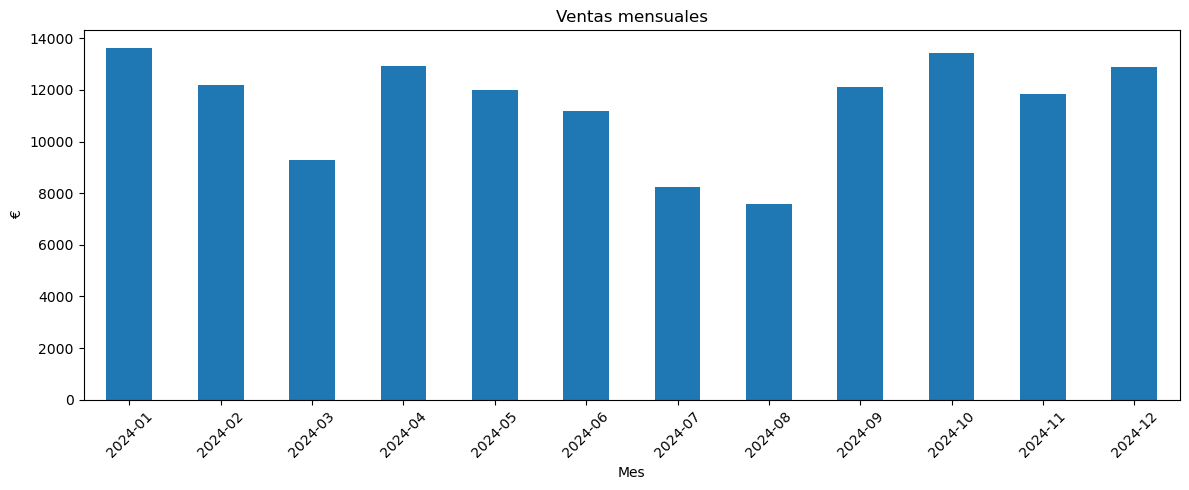

In [16]:
ventas_mensuales.plot(kind='bar',figsize=(12,5),title='Ventas mensuales')
plt.ylabel('€')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### PRODUCTOS MAS VENDIDOS

In [18]:
top_productos=df.groupby('product')['quantity'].sum().sort_values(ascending=False)

In [19]:
top_productos

product
Rascador              487
Pienso Premium        402
Collar LED            394
Snacks saludables     386
Cama para gato        373
Arena sanitaria       351
Juguete para perro    333
Name: quantity, dtype: int64

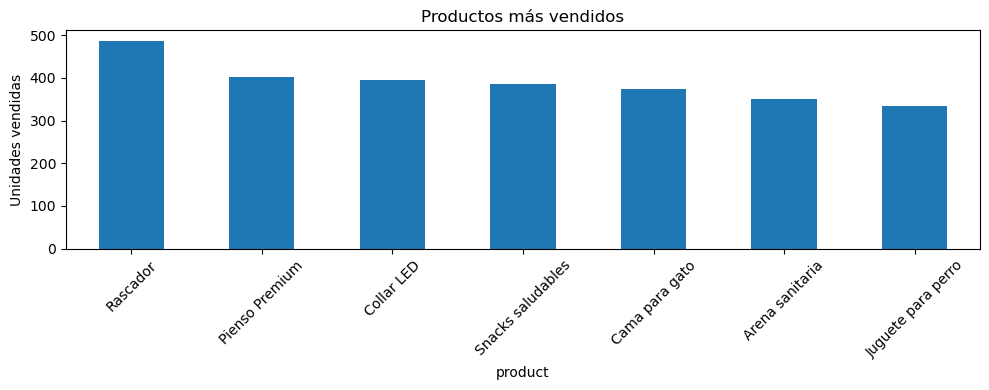

In [20]:
top_productos.plot(kind='bar',figsize=(10,4), title='Productos más vendidos')
plt.ylabel('Unidades vendidas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Clientes y regiones más importantes

In [22]:
top_clientes=df.groupby('customer')['total_sales'].sum().sort_values(ascending=False).head(10)
top_clientes

customer
Cliente_37    5363.05
Cliente_68    3294.61
Cliente_5     3129.90
Cliente_8     2787.48
Cliente_38    2742.57
Cliente_12    2642.01
Cliente_35    2635.52
Cliente_54    2559.03
Cliente_82    2470.33
Cliente_64    2436.51
Name: total_sales, dtype: float64

In [24]:
top_regiones=df.groupby('region')['total_sales'].sum().sort_values(ascending=False).head(10)
top_regiones

region
Sevilla      32098.46
Barcelona    28312.59
Madrid       27175.81
Valencia     25788.07
Bilbao       23962.39
Name: total_sales, dtype: float64

In [23]:
top_regiones=df.groupby('region')['total_sales'].sum().sort_values(ascending=False).head(10)
top_regiones

region
Sevilla      32098.46
Barcelona    28312.59
Madrid       27175.81
Valencia     25788.07
Bilbao       23962.39
Name: total_sales, dtype: float64

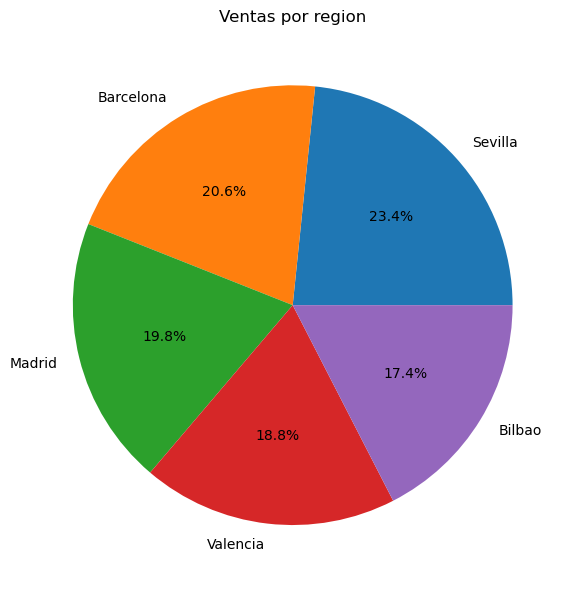

In [31]:
top_regiones.plot(kind='pie',autopct='%1.1f%%', title='Ventas por region',figsize=(6,6))
plt.ylabel("")
plt.tight_layout()
plt.show()

In [34]:
resumen=df.groupby(['product','category']).agg({
    'quantity': 'sum',
    'total_sales': 'sum'
}).sort_values(by='total_sales',ascending=False)
resumen

,,quantity,total_sales
product,category,,
Pienso Premium,Alimentación,402,22738.68
Rascador,Accesorios,487,22461.28
Cama para gato,Descanso,373,21468.87
Juguete para perro,Accesorios,333,18425.13
Snacks saludables,Alimentación,386,17974.14
Collar LED,Accesorios,394,17859.16
Arena sanitaria,Higiene,351,16410.06


In [35]:
resumen.to_excel('resumen_ventas.xlsx')